In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# **Model 1,2 and 3 use Xception for feature extraction**

In [ ]:
from tensorflow.keras.applications  import Xception
model = Xception(input_shape=(224,224,3),weights='imagenet', include_top=False)
model.trainable = False

Myopia model

In [ ]:
model1 = tf.keras.models.load_model('/content/gdrive/MyDrive/Ocular/Myopia_Xception.h5')

In [ ]:
model1.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

# **Cataract model**

In [ ]:
model2 = tf.keras.models.load_model('/content/gdrive/MyDrive/Ocular/Copy of model_xception.h5')

In [ ]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

# **Glycoma model**

In [ ]:
model3 = tf.keras.models.load_model('/content/gdrive/MyDrive/Ocular/glaucoma_model_xception_224.h5')

In [ ]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

# **Diabetes model (vgg 19)**

In [ ]:
model4 = tf.keras.models.load_model('/content/gdrive/MyDrive/Ocular/Copy of model_20_6_21.h5')
model4.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

# **Freezing the layers**

In [ ]:
inf = 0
for layer in model4.layers:
    # make not trainable
    layer.trainable = False
    # rename to avoid 'unique layer name' issue
    layer._name = 'ensemble_' + str(inf+1) + '_' + layer.name
    inf += 1

# **Getting classification layers from Model 1,2 and 3**

In [ ]:
# dlayer11 = model1.get_layer(index= -5)
dlayer12 = model1.get_layer(index= -4)
dlayer13 = model1.get_layer(index= -3)
dlayer14 = model1.get_layer(index= -2)
dlayer15 = model1.get_layer(index= -1)

In [ ]:
dlayer20 = model2.get_layer(index= -4)
dlayer21 = model2.get_layer(index= -3)
dlayer22 = model2.get_layer(index= -2)
dlayer23 = model2.get_layer(index= -1)

In [ ]:
dlayer30 = model3.get_layer(index= -4)
dlayer31 = model3.get_layer(index= -3)
dlayer32 = model3.get_layer(index= -2)
dlayer33 = model3.get_layer(index= -1)

In [ ]:
modeln = model.output
common = GlobalAveragePooling2D()(modeln)

# **Combining classifiers of all models**

In [ ]:
# combi1 = dlayer11(common)
combi1 = dlayer12(common)
combi1 = dlayer13(combi1)
combi1 = dlayer14(combi1)
combi1 = dlayer15(combi1)

In [ ]:
combi2 = dlayer20(common)
combi2 = dlayer21(combi2)
combi2 = dlayer22(combi2)
combi2 = dlayer23(combi2)

In [ ]:
combi3 = dlayer30(common)
combi3 = dlayer31(combi3)
combi3 = dlayer32(combi3)
combi3 = dlayer33(combi3)

In [ ]:
dlayer30._name = 'dlayer30'
dlayer31._name = 'dlayer31'
dlayer32._name = 'dlayer32'
dlayer33._name = 'dlayer33'

In [ ]:
from tensorflow.keras.layers import concatenate
modeln = concatenate([combi3,combi2,combi1,model4.output])

# **New model that classifies all diseases**

In [ ]:
modelend = Model(inputs=[model.input,model4.input], outputs=modeln)

In [ ]:
modelend.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [ ]:
modelend.save('/content/gdrive/MyDrive/Ocular/modelcombi_v2_gly+cat+myo+dbts.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


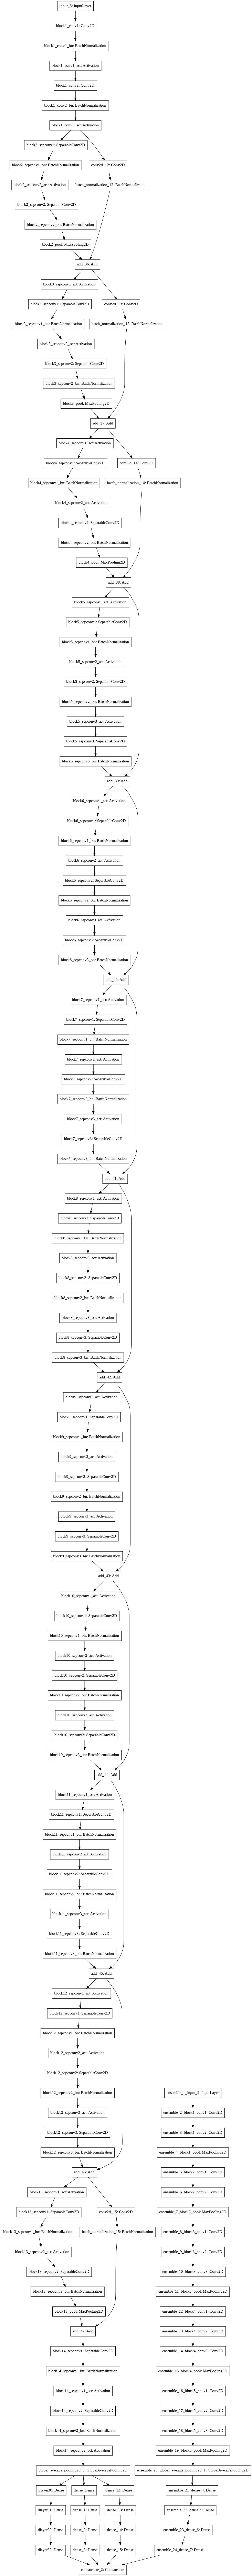

In [ ]:
tf.keras.utils.plot_model(modelend,to_file= 'modelcombi.png')